#### 1. IMDB 리뷰 데이터에 대한 이해

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb


케라스 데이터셋으로부터 imdb.data_load()를 통해 영화 리뷰 데이터를 로드합니다. 

IMDB 리뷰 데이터는 앞서 배운 로이터 뉴스 데이터에서 훈련 데이터와 테스트 데이터를 우리가 직접 비율을 조절했던 것과는 달리 이미 훈련 데이터와 테스트 데이터를 50:50 비율로 구분해서 제공합니다.

imdb.data_load()의 인자로 num_words를 사용하면 이 데이터에서 등장 빈도 순위로 몇 등까지의 단어를 사용할 것인지를 의미합니다. 

예를 들어서 10,000을 넣으면, 등장 빈도 순위가 1~10,000에 해당하는 단어만 사용하게 됩니다. 즉, 단어 집합의 크기는 10,000이 됩니다. 지금은 별도로 제한하지 않겠습니다. 훈련용 리뷰의 개수, 테스트용 리뷰의 개수, 카테고리의 수를 출력합니다.

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [4]:
print('첫번째 훈련용 리뷰 :',X_train[0])
print('첫번째 훈련용 리뷰의 레이블 :',y_train[0])

첫번째 훈련용 리뷰 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블 : 1


리뷰 본문에 해당하는 X_train[0]에는 숫자들이 들어있습니다. 
이 데이터는 토큰화와 정수 인코딩이라는 텍스트 전처리가 끝난 상태입니다. 
IMDB 리뷰 데이터는 전체 데이터에서 각 단어들의 등장 빈도에 따라서 인덱스를 부여했습니다. 숫자가 낮을수록 이 데이터에서 등장 빈도 순위가 높습니다. 
위에서 단어 집합의 크기를 제한하지 않았기 때문에 22,665와 같은 큰 숫자도 보입니다.

첫번째 훈련용 리뷰의 레이블에 해당하는 y_train[0]의 값은 1입니다. 
이 문제의 경우 감성 정보로서 0 또는 1의 값을 가지는데 긍정은 1의 값을 가집니다. 
25,000개의 훈련용 리뷰의 각 길이는 전부 다른데, 리뷰의 길이 분포를 그래프로 시각화해보겠습니다.

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


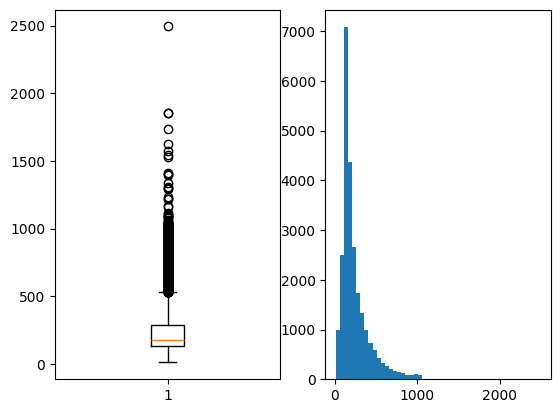

In [5]:
reviews_length = [len(review) for review in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length, bins=50)
plt.show()

In [6]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


25,000개의 리뷰가 존재하는데 두 레이블 0과 1은 각각 12,500개로 균등한 분포를 가지고 있습니다. 
X_train에 들어있는 숫자들이 각각 어떤 단어들을 나타내고 있는지 확인해보겠습니다. 

imdb.get_word_index()에 각 단어와 맵핑되는 정수가 저장되어져 있습니다.
 
주의할 점은 imdb.get_word_index()에 저장된 값에 +3을 해야 실제 맵핑되는 정수입니다. 
이것은 IMDB 리뷰 데이터셋에서 정한 규칙입니다.

In [7]:
word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

index_to_word에 인덱스를 집어넣으면 전처리 전에 어떤 단어였는지 확인할 수 있습니다. 

IMDB 리뷰 데이터셋에서는 0, 1, 2, 3은 특별 토큰으로 취급하고 있습니다. 

그래서 정수 4부터가 실제 IMDB 리뷰 데이터셋에서 빈도수가 가장 높은 실제 영단어입니다.

In [8]:
print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))
print('빈도수 상위 3938등 단어 : {}'.format(index_to_word[3941]))

빈도수 상위 1등 단어 : the
빈도수 상위 3938등 단어 : suited


In [9]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

#### 2. GRU로 IMDB 리뷰 감성 분류하기

단어 집합의 크기를 10,000으로 제한하고, 리뷰 최대 길이는 500으로 제한하여 패딩을 진행합니다.

In [10]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 10000
max_len = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

하이퍼파라미터인 임베딩 벡터의 차원은 100, 은닉 상태의 크기는 128입니다. 
모델은 다 대 일 구조의 GRU를 사용합니다. 
해당 모델은 마지막 시점에서 두 개의 선택지 중 하나를 예측하는 이진 분류 문제를 수행하는 모델입니다. 
이진 분류 문제의 경우, 출력층에 로지스틱 회귀를 사용해야 하므로 활성화 함수로는 시그모이드 함수를 사용하고, 손실 함수로 크로스 엔트로피 함수를 사용합니다. 하이퍼파라미터인 배치 크기는 64이며, 15 에포크를 수행합니다.

EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)는 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 4회 증가하면 정해진 에포크가 도달하지 못하였더라도 학습을 조기 종료(Early Stopping)한다는 의미입니다. ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다. 

validation_split=0.2을 사용하여 훈련 데이터의 20%를 검증 데이터로 분리해서 사용하고, 검증 데이터를 통해서 훈련이 적절히 되고 있는지 확인합니다. 검증 데이터는 기계가 훈련 데이터에 과적합되고 있지는 않은지 확인하기 위한 용도로 사용됩니다.

In [11]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - acc: 0.6165 - loss: 0.6396
Epoch 1: val_acc improved from -inf to 0.81440, saving model to GRU_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 211ms/step - acc: 0.6168 - loss: 0.6394 - val_acc: 0.8144 - val_loss: 0.4129
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - acc: 0.8317 - loss: 0.3948
Epoch 2: val_acc improved from 0.81440 to 0.83160, saving model to GRU_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 205ms/step - acc: 0.8317 - loss: 0.3948 - val_acc: 0.8316 - val_loss: 0.3883
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - acc: 0.8703 - loss: 0.3168
Epoch 3: val_acc improved from 0.83160 to 0.84500, saving model to GRU_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 205ms/step - acc: 0.8703 - loss: 0.3168 - val_acc: 0.8450 - val_loss: 0.3656
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - acc: 0.8922 - loss: 0.2748
Epoch 4: val_acc improved from 0.84500 to 0.86140, saving model to GRU_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 208ms/step - acc: 0.8921 - loss: 0.2748 - val_acc: 0.8614 - val_loss: 0.3359
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - acc: 0.9022 - loss: 0.2466
Epoch 5: val_acc did not improve from 0.86140
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 211ms/step - acc: 0.9022 - loss: 0.2466 - val_acc: 0.8356 - val_loss: 0.4896
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - acc: 0.9281 - loss: 0.1961
Epoch 6: val_acc improved from 0.86140 to 0.88460, saving model to GRU_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 213ms/step - acc: 0.9281 - loss: 0.1961 - val_acc: 0.8846 - val_loss: 0.2954
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - acc: 0.9389 - loss: 0.1670
Epoch 7: val_acc did not improve from 0.88460
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 210ms/step - acc: 0.9389 - loss: 0.1671 - val_acc: 0.8760 - val_loss: 0.3145
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - acc: 0.9524 - loss: 0.1369
Epoch 8: val_acc did not improve from 0.88460
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 206ms/step - acc: 0.9524 - loss: 0.1369 - val_acc: 0.8548 - val_loss: 0.4463
Epoch 9/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - acc: 0.9598 - loss: 0.1141
Epoch 9: val_acc did not improve from 0.88460
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 205ms/step - acc: 0.9598 - loss: 0.1142 - val_acc: 0.8770 - val_loss: 0.3132
Epoch 10/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - acc: 0.9703 - loss: 0.0895
Epoch 10: val_acc did not improve from 0.88460
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 205ms/ste

In [12]:
loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - acc: 0.8775 - loss: 0.3063

 테스트 정확도: 0.8794


In [13]:
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len)
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [14]:
test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
88.15% 확률로 부정 리뷰입니다.


C:\Users\User\AppData\Local\Temp\ipykernel_1804\3557684464.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_sequence)) # 예측


In [20]:
test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
98.09% 확률로 긍정 리뷰입니다.


C:\Users\User\AppData\Local\Temp\ipykernel_1804\3557684464.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_sequence)) # 예측


In [21]:
test_input="I had high hopes, but this was really disappointing. The quality was poor, and it felt like a complete waste of time."

sentiment_predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
98.27% 확률로 부정 리뷰입니다.


C:\Users\User\AppData\Local\Temp\ipykernel_1804\3557684464.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_sequence)) # 예측


In [22]:
test_input="fuck."

sentiment_predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
89.47% 확률로 긍정 리뷰입니다.


C:\Users\User\AppData\Local\Temp\ipykernel_1804\3557684464.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_sequence)) # 예측
